## Observations and Insights 

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_set = pd.merge(mouse_metadata, study_results, how = "outer", on = 'Mouse ID')

In [129]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cln_data = data_set.drop_duplicates(subset= ["Mouse ID", "Timepoint"])
cln_data.head(200)
len (cln_data)


1888

In [130]:
# Checking the number of mice in the DataFrame.
tot_mice = cln_data ["Mouse ID"].value_counts()
print (tot_mice)

u327    10
m550    10
q787    10
w575    10
o562    10
        ..
h428     1
d133     1
b447     1
n482     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [113]:
# Checking the number of mice in the clean DataFrame.
len (tot_mice)

249

## Summary Statistics

In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystats = pd.DataFrame(cln_data.groupby("Drug Regimen").count())

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystats["Mean"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

#Clean up columns, just keeping a count column for some of the graphs below
summarystats = summarystats[["Mean", "Median", "Standard Deviation", "Variance", "SEM"]]


summarystats.head(10)

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

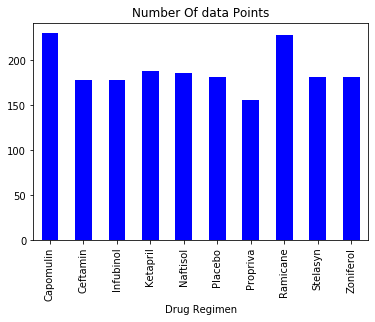

<Figure size 432x288 with 0 Axes>

In [135]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down only to those columns to chart
#datapoints = summarystats[["Mouse ID"]]
Mouse_ID = pd.DataFrame(cln_data.groupby("Drug Regimen").count())
# Use DataFrame.plot() in order to create a bar chart of the data
Mouse_ID.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Number Of data Points")

plt.show()
plt.tight_layout()

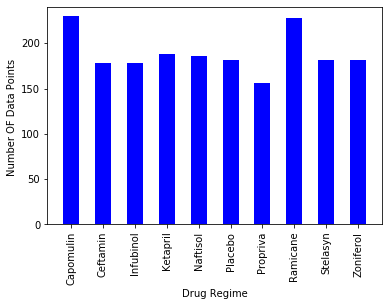

In [146]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Mouse ID"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Mouse ID"])+10)

# Set a Title and labels
#plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")
plt.ylabel("Number OF Data Points ")


# Save our graph and show the grap
plt.show()

## Pie Plots

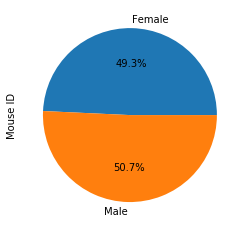

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

summary = pd.DataFrame(cln_data.groupby("Sex").count())["Mouse ID"]

# Use DataFrame.plot() in order to create a bar chart of the da
summary.plot(kind="pie", labels=summary.index.values, 
        autopct="%1.1f%%", subplots= "Sex",legend=False)


plt.show()

## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
 Tumor_Volume = cln_data.loc[cln_data("Timepoint") ==45, "Tumor Volume"]

cap = cln_data.loc[(cln_data["Drug Regimen"] == "Capomulin")
ram =  cln_data.loc (cln_data["Drug Regimen"] == "Ramicane")
inf =  cln_data.loc (cln_data["Drug Regimen"] == "Infubinol")
cef =  cln_data.loc (cln_data["Drug Regimen"] == "Ceftamin")
pd.DataFrame[]

TumCap = cap.loc[cap[:Timepoint"] == 45,"Tumor Volume (mm3)"]
TumRam = ram.loc[ram[:Timepoint"] == 45,"Tumor Volume (mm3)"]
TumInf = inf.loc[inf[:Timepoint"] == 45,"Tumor Volume (mm3)"]
TumCef = cef.loc[cef[:Timepoint"] == 45,"Tumor Volume (mm3)"]
                     
# Determine quartiles
quartCap = TumCap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCap = quartiles[0.25]
upperqCap = quartiles[0.75]
iqrCap = upperqCap-lowerqCap
                     
quartRam = TumRam['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqRam = quartiles[0.25]
upperqRam = quartiles[0.75]
iqrRam = upperqRam-lowerqRam
                     
quartInf = TumInf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqInf = quartiles[0.25]
upperqInf = quartiles[0.75]
iqrInf = upperqInf-lowerqInf
                    
quartCef = TumCef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCef = quartiles[0.25]
upperqCef = quartiles[0.75]
iqrCap = upperqCef-lowerqCef
                     
# Determine upper and lower bounds
lower_bound_Cap = lowerqCap - (1.5*iqrCap)
upper_bound_Cap = upperqCap + (1.5*iqrCap)
lower_bound_Ram = lowerqRam - (1.5*iqrRam)
upper_bound_Ram = upperqRam + (1.5*iqrRam)
lower_bound_Inf = lowerqInf - (1.5*iqrInf)
upper_bound_Inf = upperqInf + (1.5*iqrInf)
lower_bound_Cef = lowerqCef - (1.5*iqrCef)
upper_bound_Cef = upperqCef + (1.5*iqrCef)
                     
# Print a filtered dataframe of any outliers
outliersCap = quartCap.loc[(quartCap['Tumor Volume (mm3)'] > upper_bound_Cap) | (quartCap['Tumor Volume (mm3)'] < lower_bound_Cap), :]
outliersCap
 outliersRam = quartRam.loc[(quartRam['Tumor Volume (mm3)'] > upper_bound_Ram) | (quartRam['Tumor Volume (mm3)'] < lower_bound_Cap), :]
outliersRam
outliersInf = quartInf.loc[(quartInf['Tumor Volume (mm3)'] > upper_bound_Inf) | (quartInf['Tumor Volume (mm3)'] < lower_bound_Inf), :]
outliersInf
outliersCef = quartCef.loc[(quartCef['Tumor Volume (mm3)'] > upper_bound_Cef) | (quartCef['Tumor Volume (mm3)'] < lower_bound_Cef), :]
outliersCef


IndentationError: unexpected indent (<ipython-input-142-cb9bab4552ff>, line 2)

In [132]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
DataPlt = [TumCap, TumRam, TumInf, TumCef]
fig = plt.figure (1, figsize=(9,6))
ax = fig.add_subplot(111)


ax1.set_ylabel('Final Tumor Volume(mm3)')
bp = ax.boxplot(DataPlt)
plt.show()

NameError: name 'TumCap' is not defined

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse 1509')

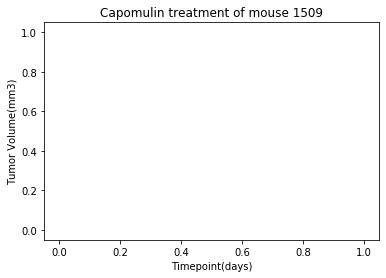

In [158]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin_df = cln_data.loc[cln_data["Drug Regimen"] == "Capomulin"]

Cap_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "1509"]

# Set variables to hold relevant data
timepoint = Cap_df["Timepoint"]
tumor_volume = Cap_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume(mm3)')
plt.title('Capomulin treatment of mouse 1509')




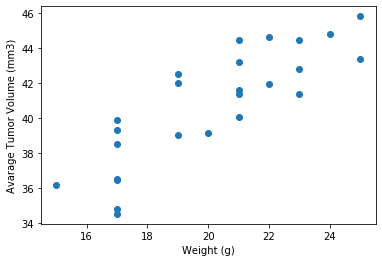

In [156]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Pull values for x and y values
m_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(m_weight,tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Avarage Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

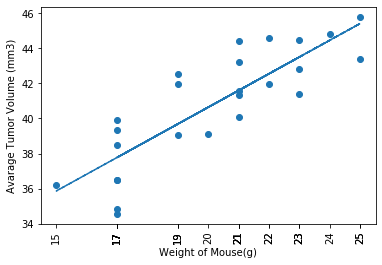

The correlation between weight and tumor value is 0.84


In [157]:
# Calculate the correlation coefficient and linear regression model 
# Pull values for x and y values
m_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(m_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * m_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse(g)")
plt.ylabel("Avarage Tumor Volume (mm3)")
plt.plot(m_weight,fit,"--")
plt.xticks(m_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(m_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

# for mouse weight and average tumor volume for the Capomulin regimen
